In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from apyori import apriori

## Análisis Exploratorio

In [21]:
# Variable classification
train_data = pd.read_csv('./train.csv', encoding = "ISO-8859-1")
test_data = pd.read_csv('./test.csv', encoding = "ISO-8859-1")
variables = pd.read_csv('./variables.txt', encoding = "ISO-8859-1")
quant_vars = list(variables.loc[(variables['Clasification'] == 'Cuantitativa')]['Variable'].values)
quali_vars = list(variables.loc[(variables['Clasification'] == 'Cualitativa')]['Variable'].values)[1:]

### Análisis de variables numéricas

In [4]:
cuantitativas = train_data[quant_vars]
cuantitativas.dropna(inplace = True)

cuantitativas.describe()

<ipython-input-4-24830b995ec2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuantitativas.dropna(inplace = True)


LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1195.000000    1195.000000  1195.000000  1195.000000  1195.000000   
mean     70.030126    9953.560669   102.703766   425.752301    43.191632   
std      24.289276    7941.382527   185.404454   463.904797   154.851036   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7417.500000     0.000000     0.000000     0.000000   
50%      69.000000    9250.000000     0.000000   351.000000     0.000000   
75%      80.000000   11248.500000   160.000000   689.500000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1195.000000  1195.000000  1195.000000  1195.000000   1195.000000  ...   
mean    589.180753  1058.124686  1157.647699   346.349791      6.654393  ...   
std     448.798854   448.234819   386.102362   435.239519     51.483326  ...   
min       0.000000     0.000000   334.000000     0.000000      0.000000  ...   
25%     245.000000   783.500000   875.500000     0.000000      0.000000  ...   
50%     506.000000   988.000000  1080.000000     0.000000      0.000000  ...   
75%     833.000000  1307.500000  1383.000000   727.500000      0.000000  ...   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1195.000000  1195.000000  1195.000000  1195.000000    1195.000000   
mean      1.762343   471.810042    89.556485    45.584937      22.845188   
std       0.778966   221.391454   120.490834    65.778002      61.793439   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   308.000000     0.000000     0.000000       0.000000   
50%       2.000000   478.000000     0.000000    24.000000       0.000000   
75%       2.000000   578.000000   168.000000    66.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal      SalePrice  
count  1195.000000  1195.000000  1195.000000  1195.000000    1195.000000  
mean      3.141423    15.103766     2.753138    25.618410  180444.014226  
std      28.846488    56.116452    38.962166   190.250285   83171.435908  
min       0.000000     0.000000     0.000000     0.000000   34900.000000  
25%       0.000000     0.000000     0.000000     0.000000  127500.000000  
50%       0.000000     0.000000     0.000000     0.000000  159000.000000  
75%       0.000000     0.000000     0.000000     0.000000  213495.000000  
max     508.000000   480.000000   648.000000  3500.000000  755000.000000  

[8 rows x 29 columns]

In [ ]:
profile_quant = ProfileReport(train_data[quant_vars], minimal = True, title="Houses Data Report")
#profile.to_file(output_file='output.html')

In [ ]:
profile_quant

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlación variables númericas

In [ ]:
corrmat = train_data[quant_vars].corr()
corrmat

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.426095    0.193458    0.233633    0.049900   
LotArea           0.426095  1.000000    0.104160    0.214103    0.111170   
MasVnrArea        0.193458  0.104160    1.000000    0.264736   -0.072319   
BsmtFinSF1        0.233633  0.214103    0.264736    1.000000   -0.050117   
BsmtFinSF2        0.049900  0.111170   -0.072319   -0.050117    1.000000   
BsmtUnfSF         0.132644 -0.002618    0.114442   -0.495251   -0.209294   
TotalBsmtSF       0.392075  0.260833    0.363936    0.522396    0.104810   
1stFlrSF          0.457181  0.299475    0.344501    0.445863    0.097117   
2ndFlrSF          0.080177  0.050986    0.174561   -0.137079   -0.099260   
LowQualFinSF      0.038469  0.004779   -0.069071   -0.064503    0.014807   
GrLivArea         0.402797  0.263116    0.390857    0.208171   -0.009640   
BsmtFullBath      0.100949  0.158155    0.085310    0.649212    0.158678   
BsmtHalfBath     -0.007234  0.048046    0.026673    0.067418    0.070948   
FullBath          0.198769  0.126031    0.276833    0.058543   -0.076444   
HalfBath          0.053532  0.014259    0.201444    0.004262   -0.032148   
BedroomAbvGr      0.263170  0.119690    0.102821   -0.107355   -0.015728   
KitchenAbvGr     -0.006069 -0.017784   -0.037610   -0.081007   -0.040751   
TotRmsAbvGrd      0.352096  0.190015    0.280682    0.044316   -0.035227   
Fireplaces        0.266639  0.271364    0.249070    0.260011    0.046921   
GarageCars        0.285691  0.154871    0.364204    0.224054   -0.038264   
GarageArea        0.344997  0.180403    0.373066    0.296970   -0.018227   
WoodDeckSF        0.088521  0.171698    0.159718    0.204306    0.067898   
OpenPorchSF       0.151972  0.084774    0.125703    0.111761    0.003093   
EnclosedPorch     0.010700 -0.018340   -0.110204   -0.102303    0.036543   
3SsnPorch         0.070029  0.020423    0.018796    0.026451   -0.029993   
ScreenPorch       0.041383  0.043160    0.061466    0.062021    0.088871   
PoolArea          0.206167  0.077672    0.011723    0.140491    0.041709   
MiscVal           0.003368  0.038068   -0.029815    0.003571    0.004940   
SalePrice         0.351799  0.263843    0.477493    0.386420   -0.011378   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
LotFrontage     0.132644     0.392075  0.457181  0.080177      0.038469  ...   
LotArea        -0.002618     0.260833  0.299475  0.050986      0.004779  ...   
MasVnrArea      0.114442     0.363936  0.344501  0.174561     -0.069071  ...   
BsmtFinSF1     -0.495251     0.522396  0.445863 -0.137079     -0.064503  ...   
BsmtFinSF2     -0.209294     0.104810  0.097117 -0.099260      0.014807  ...   
BsmtUnfSF       1.000000     0.415360  0.317987  0.004469      0.028167  ...   
TotalBsmtSF     0.415360     1.000000  0.819530 -0.174512     -0.033245  ...   
1stFlrSF        0.317987     0.819530  1.000000 -0.202646     -0.014241  ...   
2ndFlrSF        0.004469    -0.174512 -0.202646  1.000000      0.063353  ...   
LowQualFinSF    0.028167    -0.033245 -0.014241  0.063353      1.000000  ...   
GrLivArea       0.240257     0.454868  0.566024  0.687501      0.134683  ...   
BsmtFullBath   -0.422900     0.307351  0.244671 -0.169494     -0.047143  ...   
BsmtHalfBath   -0.095804    -0.000315  0.001956 -0.023855     -0.005842  ...   
FullBath        0.288886     0.323722  0.380637  0.421378     -0.000710  ...   
HalfBath       -0.041118    -0.048804 -0.119916  0.609707     -0.027080  ...   
BedroomAbvGr    0.166643     0.050450  0.127401  0.502901      0.105607  ...   
KitchenAbvGr    0.030086    -0.068901  0.068101  0.059306      0.007522  ...   
TotRmsAbvGrd    0.250647     0.285573  0.409516  0.616423      0.131185  ...   
Fireplaces      0.051575     0.339519  0.410531  0.194561     -0.021272  ...   
GarageCars      0.214175     0.434585  0.439317  0.183926     -0.094480  ...   
GarageArea      0.183303     0.486665  0.489782  0.138

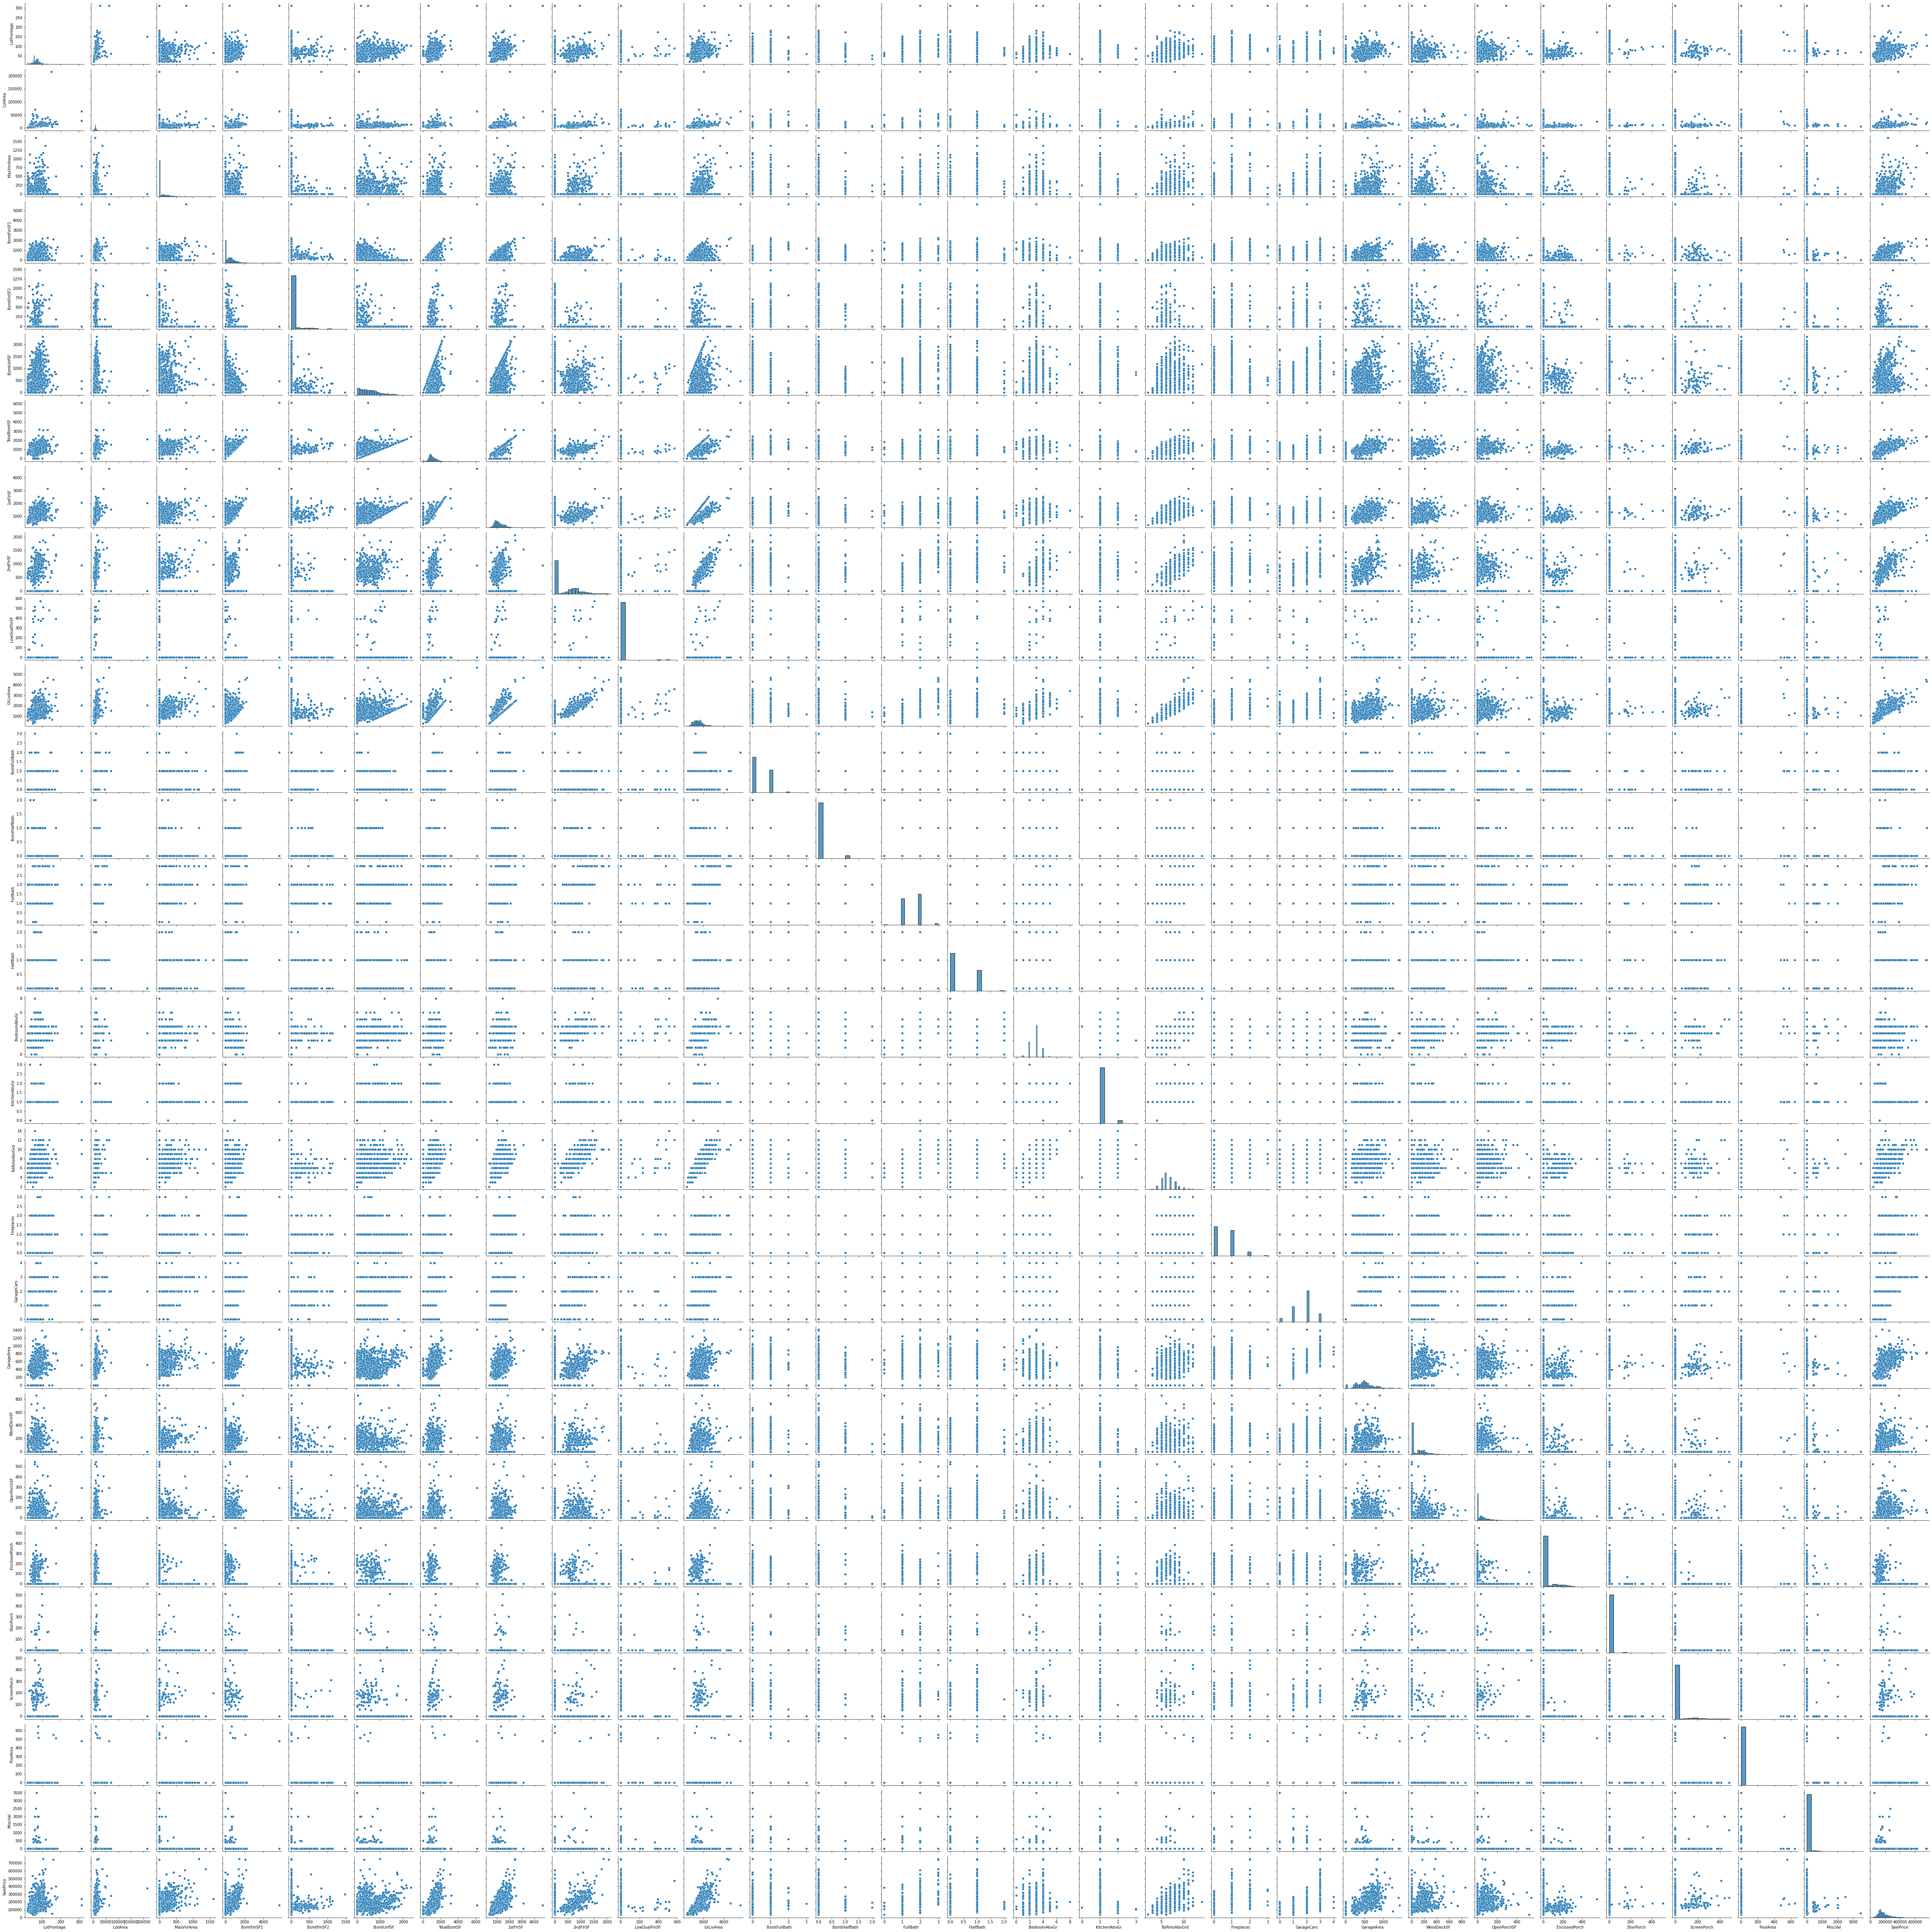

In [18]:
sns.pairplot(cuantitativas)
plt.show()

### Variables Categóricas

In [13]:
cualitativas = train_data[quali_vars]
cualitativas.describe()

MSSubClass  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean     56.897260     6.099315     5.575342  1971.267808   1984.865753   
std      42.300571     1.382997     1.112799    30.202904     20.645407   
min      20.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      20.000000     5.000000     5.000000  1954.000000   1967.000000   
50%      50.000000     6.000000     5.000000  1973.000000   1994.000000   
75%      70.000000     7.000000     6.000000  2000.000000   2004.000000   
max     190.000000    10.000000     9.000000  2010.000000   2010.000000   

       GarageYrBlt       MoSold       YrSold  
count  1379.000000  1460.000000  1460.000000  
mean   1978.506164     6.321918  2007.815753  
std      24.689725     2.703626     1.328095  
min    1900.000000     1.000000  2006.000000  
25%    1961.000000     5.000000  2007.000000  
50%    1980.000000     6.000000  2008.000000  
75%    2002.000000     8.000000  2009.000000  
max    2010.000000    12.000000  2010.000000

In [ ]:
profile_quali = ProfileReport(train_data[quali_vars], minimal = True, title="Houses Data Report")
#profile.to_file(output_file='output.html')

In [ ]:
profile_quali

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

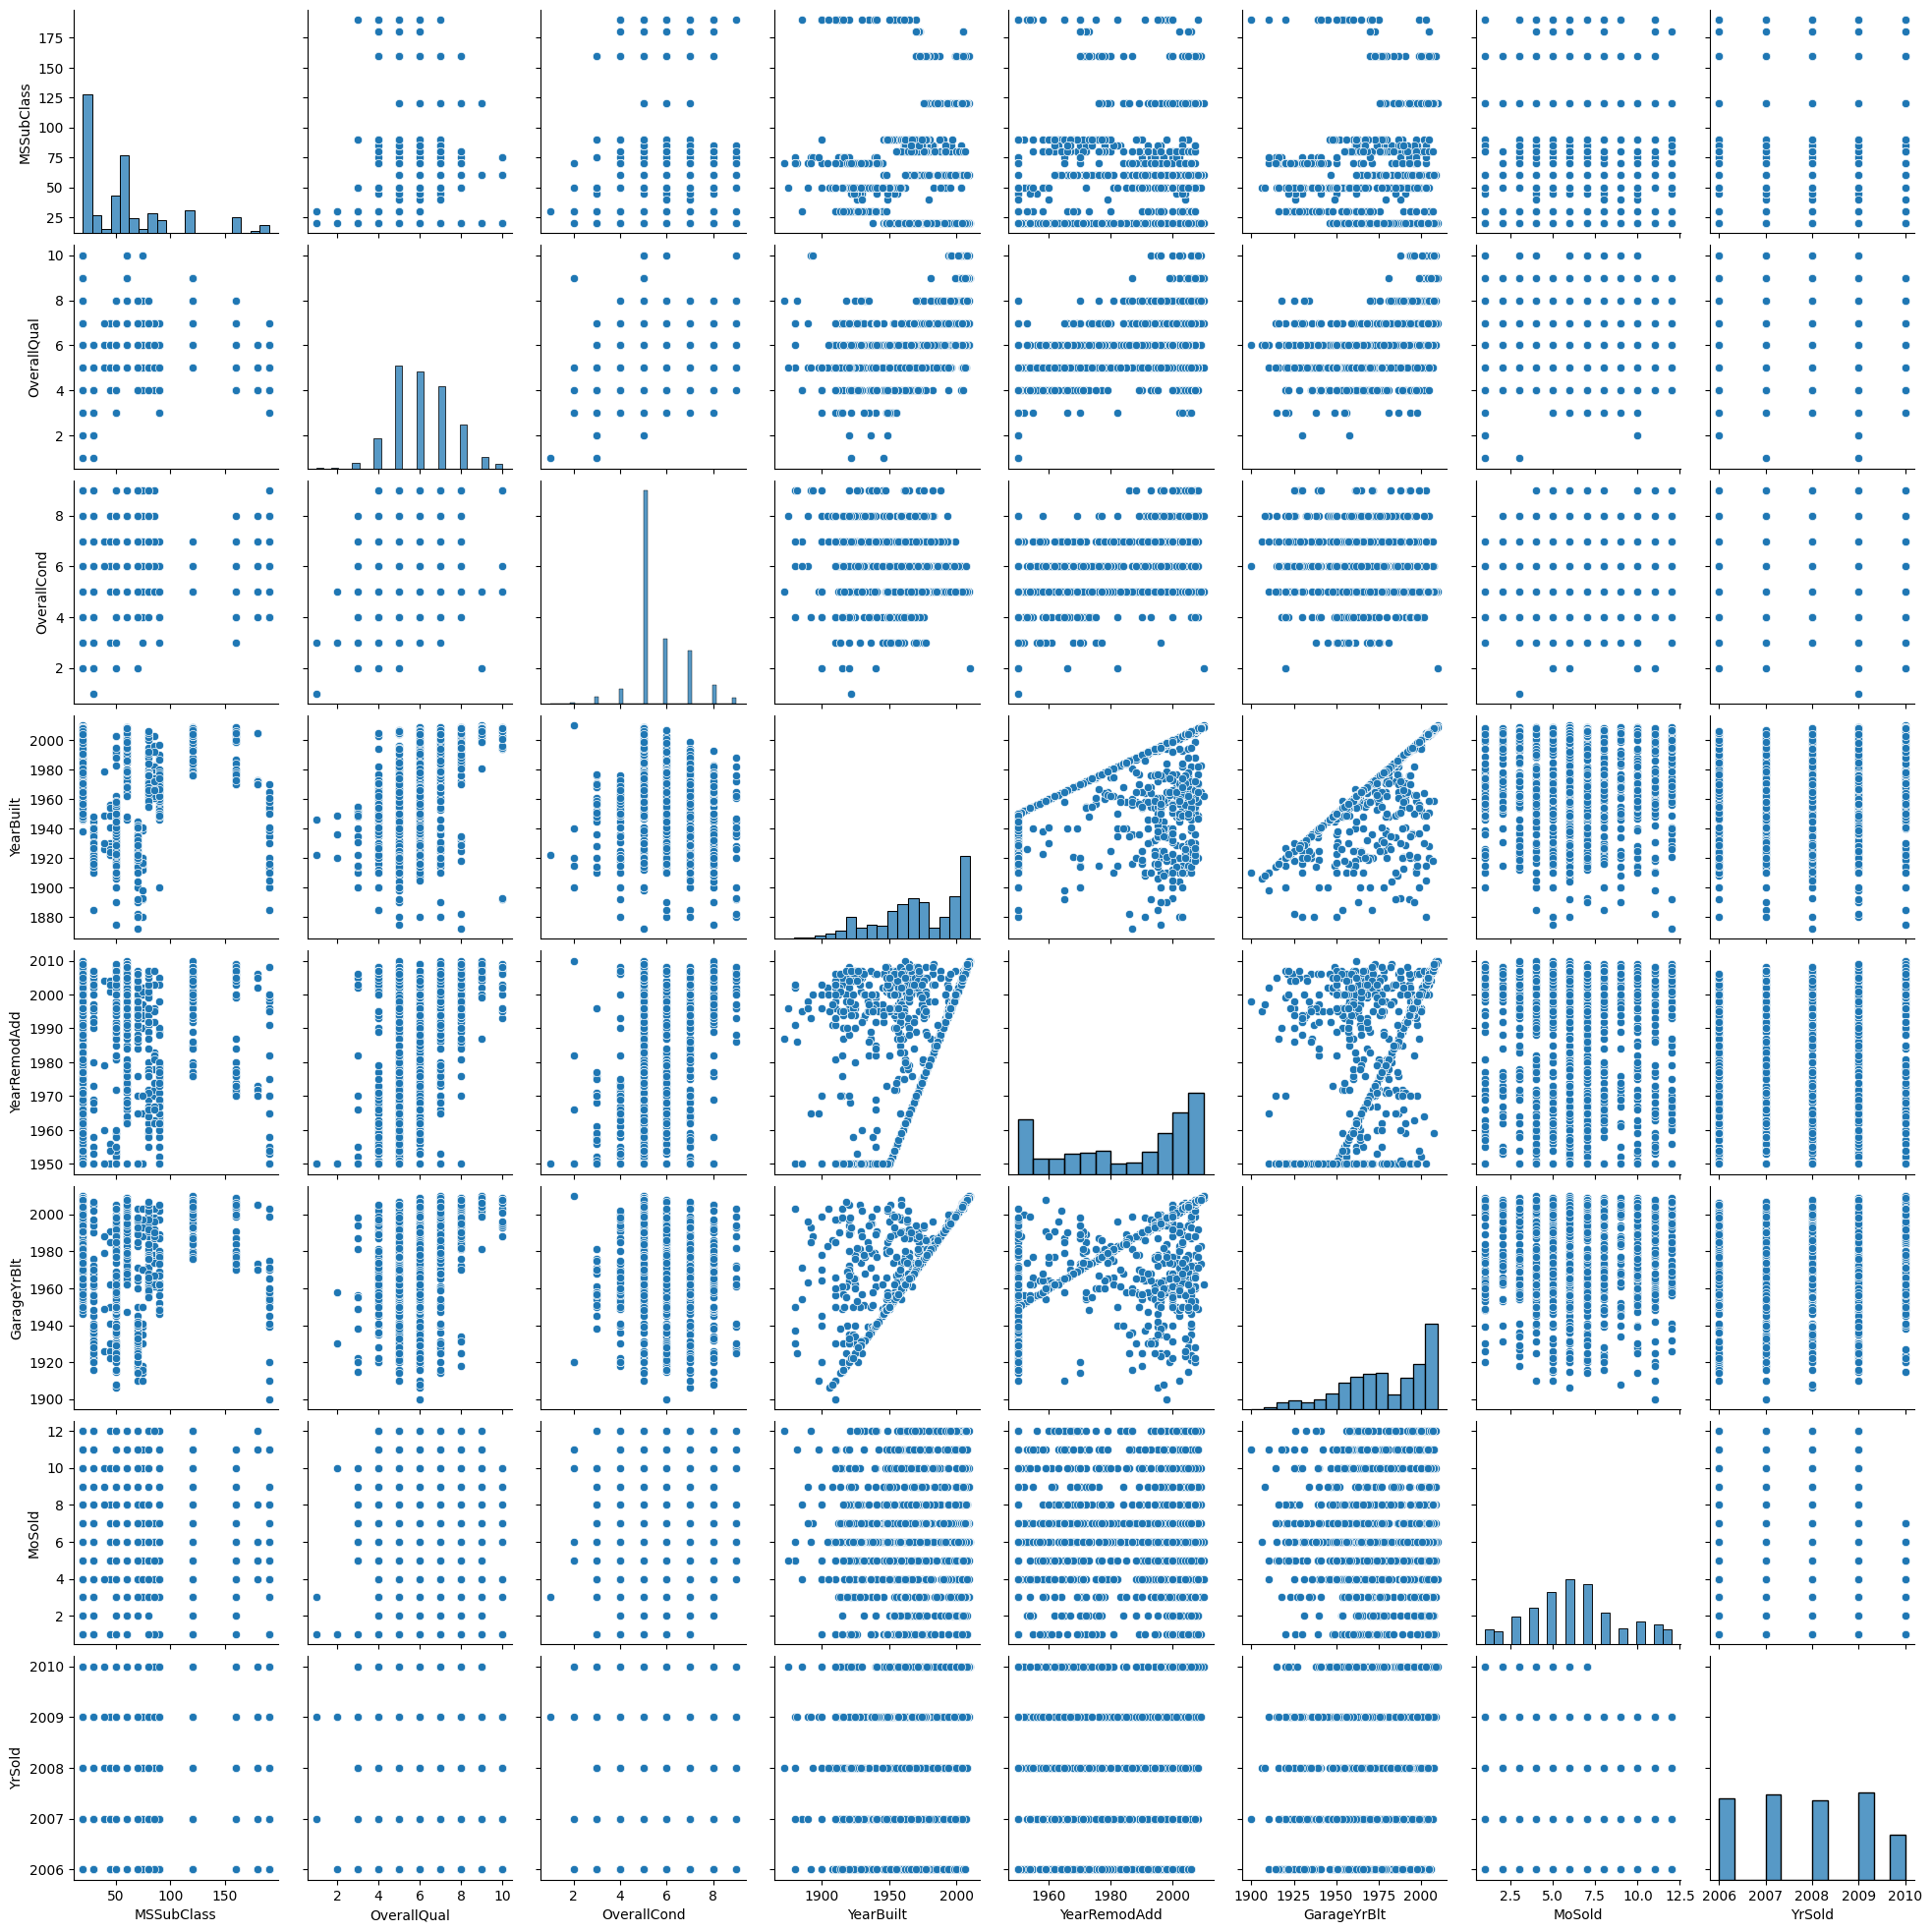

In [22]:
sns.pairplot(cualitativas)
plt.show()

## Análisis de componentes principales (PCA)

### Test de Esfericidad de Bartlett

HO: La matriz de correlación es igual a la matriz identidad

In [ ]:
chi_cuadrado, p_valor = calculate_bartlett_sphericity(cuantitativas.drop(['TotalBsmtSF'], axis=1))
chi_cuadrado, p_valor

(53687.17834301343, 0.0)

Como p-value &lt; 0.05 rechazamos la hipótesis nula, por lo que hay correlación entre las variables

### Índice KMO

In [ ]:
kmo, kmo_modelo = calculate_kmo(cuantitativas)
kmo_modelo

/root/venv/lib/python3.9/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.7452578345344177

El índice se encuentra en un rango entre 0.7 y 0.8, por lo que la adecuación muestral para un análisis factorial es buena. Este dato indica que probablemente se podrán obtener buenos resultados haciendo PCA.

### Modelo PCA

In [ ]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(cuantitativas)
#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']

index_PCA = []

for i in range(len(cuantitativas.columns)):
    index_PCA.append('PC' + str(i +1))

#Se convierte el arreglo en data frame
pd.DataFrame(
    data = modelo_pca.components_,
    columns = cuantitativas.columns,
    index = index_PCA
)

LotFrontage       LotArea    MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
PC1   2.022018e-01  1.614685e-01  2.096880e-01    0.161739   -0.002321   
PC2   5.712030e-02  9.467321e-02  4.836335e-02    0.375209    0.115492   
PC3   2.015732e-02  1.160418e-01 -2.665353e-02    0.313644    0.171491   
PC4   3.145484e-01  2.521091e-01 -1.921407e-01   -0.040950    0.183863   
PC5   7.175565e-02  1.021685e-01 -5.162882e-02   -0.180559    0.173717   
PC6  -1.821734e-01 -1.618575e-01 -1.824653e-02    0.048281   -0.128381   
PC7   3.273252e-02 -9.642504e-02  1.421159e-01    0.136118   -0.291887   
PC8   1.490419e-01 -7.420739e-02  6.329570e-02    0.100701   -0.476177   
PC9   2.519266e-01  3.310474e-01 -9.739029e-02   -0.183964    0.335721   
PC10  9.312170e-02  1.376726e-01 -6.115269e-02    0.030282    0.104070   
PC11 -6.987102e-02 -7.175406e-02 -2.703546e-01   -0.123841    0.258350   
PC12  1.648444e-01  3.888367e-01 -1.462249e-02   -0.006216   -0.336526   
PC13  1.986217e-01  6.879617e-02 -1.860538e-01    0.058102   -0.135424   
PC14  1.865811e-01  1.968328e-01 -4.912438e-02   -0.041210   -0.154205   
PC15 -1.798284e-01 -2.444990e-01  2.337266e-01   -0.100080    0.328522   
PC16  1.991017e-01 -5.609780e-02  6.366027e-01   -0.005037    0.185443   
PC17 -1.293477e-01  1.667193e-01  9.004952e-02   -0.079513    0.121871   
PC18  4.899742e-03  1.005680e-01  1.147856e-01   -0.070088   -0.045838   
PC19 -2.094792e-01  4.951791e-01  3.874552e-01   -0.017731   -0.015223   
PC20 -4.971759e-01  3.269397e-01 -2.684970e-01    0.066632   -0.052861   
PC21 -4.371828e-01  2.175912e-01  1.965429e-01   -0.087984   -0.060002   
PC22 -1.977933e-01  2.227536e-02 -1.256677e-01    0.327120    0.065483   
PC23  3.343237e-02 -7.548291e-02 -3.850891e-02   -0.187654    0.015102   
PC24  4.456292e-02 -1.738851e-02  7.875135e-03    0.198144    0.066468   
PC25 -3.881985e-02  3.254806e-02  7.407914e-02   -0.179857   -0.069961   
PC26 -2.772154e-02 -1.667747e-02 -1.339402e-02   -0.172663   -0.045463   
PC27 -3.156381e-02 -5.192599e-03 -1.676412e-02   -0.036312   -0.004183   
PC28  1.381980e-16  1.250274e-17  2.445189e-16   -0.533632   -0.178126   
PC29 -0.000000e+00  2.076179e-16 -1.733392e-16    0.225169    0.075161   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
PC1    0.109362     0.276091  0.286415  0.156314      0.006565  ...   
PC2   -0.168420     0.259593  0.223476 -0.424769     -0.112347  ...   
PC3   -0.567507    -0.184367 -0.175528  0.277670      0.075986  ...   
PC4    0.129081     0.150380  0.240924 -0.166945      0.281527  ...   
PC5    0.158633     0.031974 -0.058332  0.013704      0.084753  ...   
PC6    0.000087     0.005705  0.016210 -0.033335     -0.052817  ...   
PC7   -0.064941    -0.024984  0.032001 -0.026714     -0.164333  ...   
PC8    0.034147    -0.026092 -0.078377  0.094512      0.045300  ...   
PC9   -0.062125    -0.136617 -0.090145  0.034939     -0.588600  ...   
PC10  -0.065848     0.001362 -0.009698 -0.004946      0.261742  ...   
PC11   0.004901    -0.034011 -0.087149  0.039953      0.212995  ...   
PC12   0.129599     0.007070  0.001194  0.003475     -0.181157  ...   
PC13   0.030719     0.044106 -0.027272  0.013925     -0.279317  ...   
PC14  -0.072036    -0.168050 -0.123761 -0.030559      0.420956  ...   
PC15   0.117017     0.127079  0.074783  0.005392     -0.164956  ...   
PC16   0.036191     0.095088 -0.032822 -0.021129      0.093713  ...   
PC17  -0.022116    -0.062334  0.016678  0.002688      0.199943  ...   
PC18   0.172526     0.084369  0.041754 -0.059687      0.127626  ...   
PC19  -0.100229    -0.123965 -0.120902  0.124249      0.004281  ...   
PC20   0.240660     0.291662  0.044703  0.063817     -0.021740  ...   
PC21   0.030456    -0.081294 -0.061101 -0.094963     -0.009663  ...   
PC22  -0.315262     0.045519  0.260052 -0.018170     -0.042198  ...   
PC23   0.063919    -0.124997 -0.002651  0.305601     -0.119280  ...   
PC24   0.146881     0.375100 -0.213889  0.452276     -0.001091  ...   
PC25  -0.05

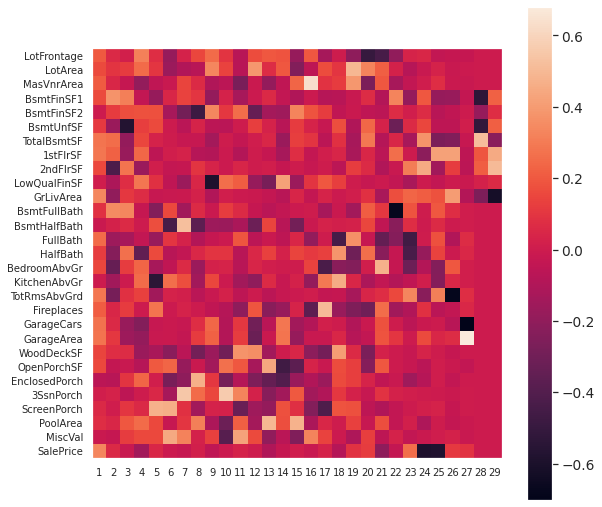

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(cuantitativas.columns)), cuantitativas.columns, fontsize=10)
plt.xticks(range(len(cuantitativas.columns)), np.arange(modelo_pca.n_components_)+1, fontsize=10)
plt.grid(False)
plt.tight_layout()
fig.set_size_inches(8, 8)
plt.colorbar();

Porcentaje de la varianza explicada por cada componente:

In [ ]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[2.31049192e-01 1.01231911e-01 6.79082380e-02 5.69620129e-02
 4.47558649e-02 4.07384016e-02 3.78372612e-02 3.64963801e-02
 3.50505281e-02 3.45723678e-02 3.25745079e-02 3.12567971e-02
 2.98972304e-02 2.83820023e-02 2.77084737e-02 2.41303065e-02
 2.20979984e-02 2.15570122e-02 2.04523778e-02 1.83908731e-02
 1.44053346e-02 1.14400072e-02 9.64458534e-03 7.25059876e-03
 6.18578961e-03 4.75847962e-03 3.26546844e-03 4.55664186e-32
 4.30082852e-34]


Scree plot

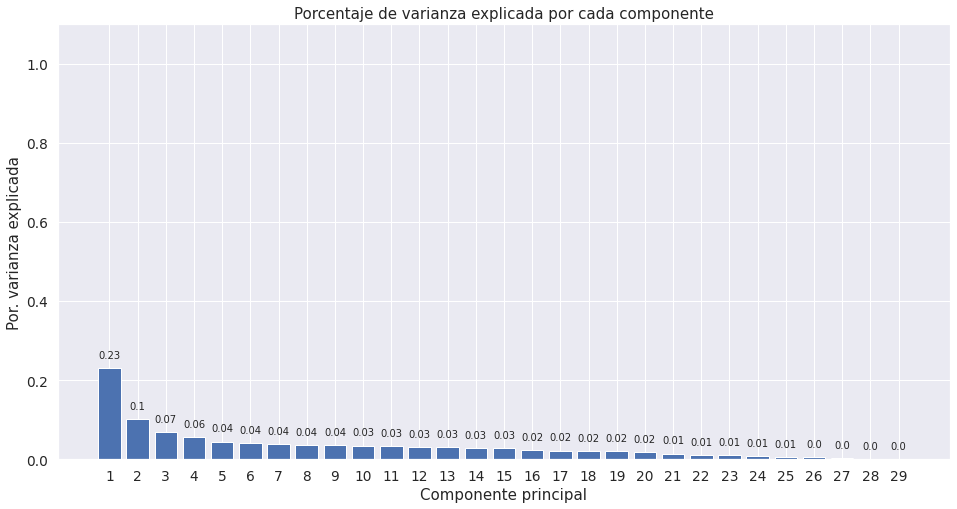

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(cuantitativas.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
fig.set_size_inches(16, 8)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.23104919 0.3322811  0.40018934 0.45715135 0.50190722 0.54264562
 0.58048288 0.61697926 0.65202979 0.68660216 0.71917666 0.75043346
 0.78033069 0.80871269 0.83642117 0.86055147 0.88264947 0.90420649
 0.92465886 0.94304974 0.95745507 0.96889508 0.97853966 0.98579026
 0.99197605 0.99673453 1.         1.         1.        ]


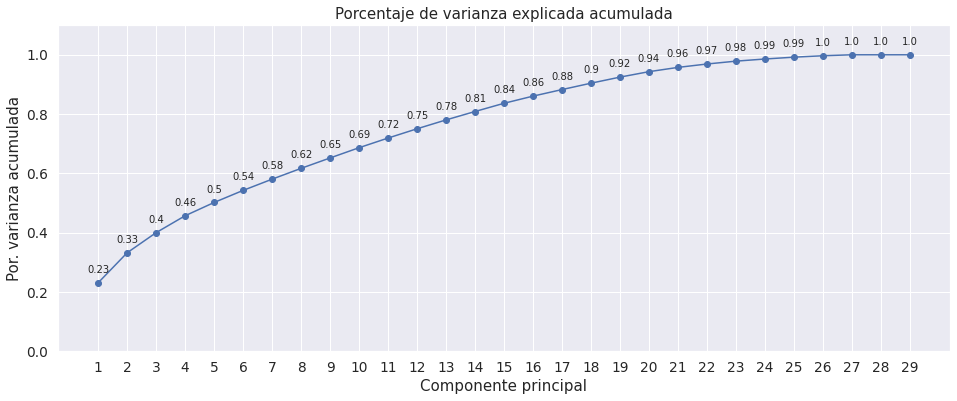

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
fig.set_size_inches(16, 6)
ax.plot(
    np.arange(len(cuantitativas.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(cuantitativas.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## Reglas de asociación

In [14]:
print(cualitativas.shape)
# Se van a convertir los datos a una lista de listas
records = []

for i in range(0, 32):
    records.append([str(cualitativas.values[i,j]) for j in range(0, 5)]) 

records

(1460, 51)


[['60', 'RL', 'Pave', 'nan', 'Reg'],
 ['20', 'RL', 'Pave', 'nan', 'Reg'],
 ['60', 'RL', 'Pave', 'nan', 'IR1'],
 ['70', 'RL', 'Pave', 'nan', 'IR1'],
 ['60', 'RL', 'Pave', 'nan', 'IR1'],
 ['50', 'RL', 'Pave', 'nan', 'IR1'],
 ['20', 'RL', 'Pave', 'nan', 'Reg'],
 ['60', 'RL', 'Pave', 'nan', 'IR1'],
 ['50', 'RM', 'Pave', 'nan', 'Reg'],
 ['190', 'RL', 'Pave', 'nan', 'Reg'],
 ['20', 'RL', 'Pave', 'nan', 'Reg'],
 ['60', 'RL', 'Pave', 'nan', 'IR1'],
 ['20', 'RL', 'Pave', 'nan', 'IR2'],
 ['20', 'RL', 'Pave', 'nan', 'IR1'],
 ['20', 'RL', 'Pave', 'nan', 'IR1'],
 ['45', 'RM', 'Pave', 'nan', 'Reg'],
 ['20', 'RL', 'Pave', 'nan', 'IR1'],
 ['90', 'RL', 'Pave', 'nan', 'Reg'],
 ['20', 'RL', 'Pave', 'nan', 'Reg'],
 ['20', 'RL', 'Pave', 'nan', 'Reg'],
 ['60', 'RL', 'Pave', 'nan', 'IR1'],
 ['45', 'RM', 'Pave', 'Grvl', 'Reg'],
 ['20', 'RL', 'Pave', 'nan', 'Reg'],
 ['120', 'RM', 'Pave', 'nan', 'Reg'],
 ['20', 'RL', 'Pave', 'nan', 'IR1'],
 ['20', 'RL', 'Pave', 'nan', 'Reg'],
 ['20', 'RL', 'Pave', 'nan', 'Reg']

In [15]:
# El mínimo de cobertura o soporte es 20% y el mínimo de confianza es 70%
reglas_asociacion = apriori(records,min_support=0.2, min_confidence = 0.8)
reglas = list(reglas_asociacion)
len(reglas)

34

In [16]:
reglas[0]

RelationRecord(items=frozenset({'Pave'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pave'}), confidence=1.0, lift=1.0)])

In [17]:
list(reglas)

[RelationRecord(items=frozenset({'Pave'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pave'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'RL'}), support=0.8125, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'RL'}), confidence=0.8125, lift=1.0)]),
 RelationRecord(items=frozenset({'nan'}), support=0.9375, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.9375, lift=1.0)]),
 RelationRecord(items=frozenset({'20', 'Pave'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'20'}), items_add=frozenset({'Pave'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'20', 'RL'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'20'}), items_add=frozenset({'RL'}), confidence=1.0, lift=1.2307692307692308)]),
 RelationRecord(items=frozenset({'20', 'nan'}), support=0.5, ordered_stati

Ya realizados los cálculos para las reglas de asociación, es necesario comprender los indicadores de rendimiento de estas reglas. Para este caso, IR1, RL PAVE, una regla interesante es donde se asocian los valores IR1 (Forma del lote irregular ), RL (low density residental) Y Pave. 

Se obtiene el valor del soporte que indica la frecuencia relativa del itemset que contiene todos los items presentes en la regla,  se obtiene un soporte de 0.40625 para este regla; La confianza; mide que tan confiable es la suposición de las transacciones que compraron X y cuantas también compraron Y, se obtuvo una confianza de 0.928 , por lo que, para todos los que compraron una low density residential y pave, el 93% también compró el lote de forma irregular.y por último un lift de 1.14, que indica que la probabilidad de comprar un lote de forma irregular aumenta cuando es un low density residential y pave.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0c1bb84e-27cf-47ba-ade1-cf73acbd4bfe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>